# Test functions with local files

**Testing `HidroCLVariable`**

In [1]:
import hidrocl
import hidrocl_paths as hc

In [2]:
print(hidrocl.__version__)
print(hidrocl.__uri__)
print(hidrocl.__summary__)

0.0.1
https://github.com/aldotapia/HidroCL-OOP


In [3]:
print(hidrocl.HidroCLVariable)

<class 'hidrocl.variables.HidroCLVariable'>


In [4]:
ndvi = hidrocl.HidroCLVariable("ndvi",
                               "./testfiles/veg_o_modis_ndvi_mean_b_d16_p0d.csv",
                               "./testfiles/veg_o_modis_ndvi_mean_pc.csv")

print(ndvi)

Database found, using ./testfiles/veg_o_modis_ndvi_mean_b_d16_p0d.csv
Database found, using ./testfiles/veg_o_modis_ndvi_mean_pc.csv

Variable ndvi.
Records: 513.
Database path: ./testfiles/veg_o_modis_ndvi_mean_b_d16_p0d.csv.
Pixel count database path: ./testfiles/veg_o_modis_ndvi_mean_pc.csv.
        


In [5]:
print(ndvi.observations)

             name_id  1001001  1001002  1001003  1020002  1020003  1021001  \
date                                                                         
2000-02-18  A2000049       49      101       67       50       85      112   
2000-03-05  A2000065       87      130      109       65       96      119   
2000-03-21  A2000081      108      144      125       80      110      126   
2000-04-06  A2000097      110      139      122       79      106      120   
2000-04-22  A2000113       92      126      107       61       88      111   
...              ...      ...      ...      ...      ...      ...      ...   
2022-04-07  A2022097      111      141      120       88      112      121   
2022-04-23  A2022113      103      134      114       88      109      118   
2022-05-09  A2022129       97      128      108       79      100      114   
2022-05-25  A2022145       91      124      104       79       99      113   
2022-06-10  A2022161       86      118       97       77       9

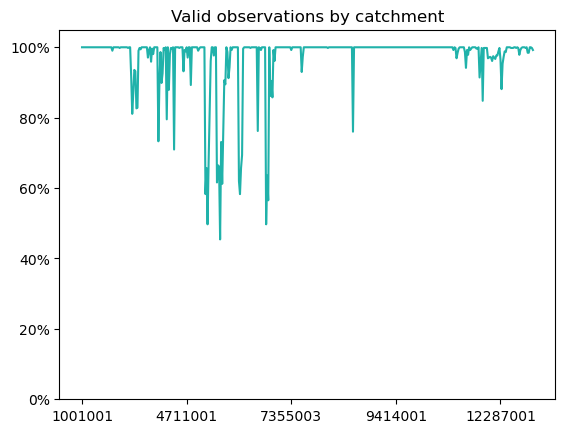

None


In [6]:
print(ndvi.plot_valid_data_all())

In [7]:
print(ndvi.catchment_names[80:90])

['4323001', '4501001', '4503001', '4511002', '4512001', '4513001', '4514001', '4515002', '4520001', '4522002']


In [8]:
print(ndvi.valid_data()[80:90])

4323001    513
4501001    408
4503001    513
4511002    451
4512001    503
4513001    512
4514001    511
4515002    513
4520001    364
4522002    513
dtype: int64


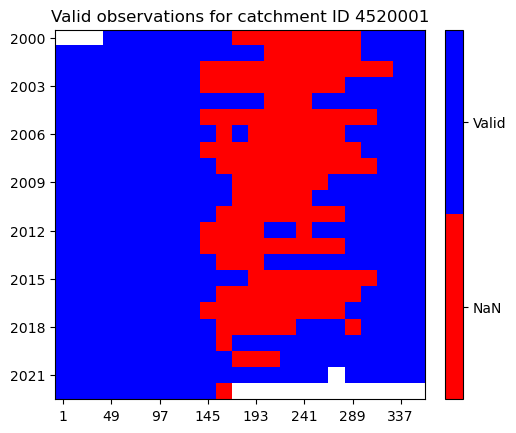

None


In [9]:
print(ndvi.plot_valid_data_individual(88))

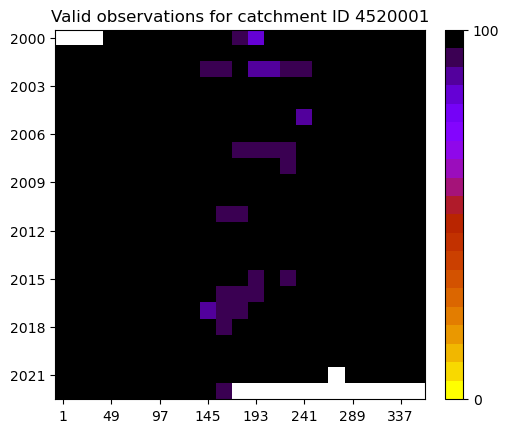

None


In [10]:
print(ndvi.plot_pixel_count(88))

<font color ='red'>**Note**: Check zonal statistics, specially mean extraction.</font> Probably the vectorized function isn't working properly

**Testing `mod13q1`**

In [11]:
evi = hidrocl.HidroCLVariable("ndvi",
                               "./testfiles/veg_o_modis_evi_mean_b_d16_p0d.csv",
                               "./testfiles/veg_o_modis_evi_mean_pc.csv")
nbr = hidrocl.HidroCLVariable("ndvi",
                               "./testfiles/veg_o_int_nbr_mean_b_d16_p0d.csv",
                               "./testfiles/veg_o_int_nbr_mean_pc.csv")

Database found, using ./testfiles/veg_o_modis_evi_mean_b_d16_p0d.csv
Database found, using ./testfiles/veg_o_modis_evi_mean_pc.csv
Database found, using ./testfiles/veg_o_int_nbr_mean_b_d16_p0d.csv
Database found, using ./testfiles/veg_o_int_nbr_mean_pc.csv


In [12]:
mod13 = hidrocl.Mod13q1(ndvi, evi, nbr,
                        "./testfiles/MOD13Q1",
                        "./testfiles/Vectors/HidroCL_boundaries_sinu.shp",
                        "./testfiles/ndvi_log.txt",
                        "./testfiles/evi_log.txt",
                        "./testfiles/nbr_log.txt")

In [13]:
print(mod13)


Product: MODIS MOD13Q1 Version 0.61

NDVI records: 513.
NDVI database path: ./testfiles/veg_o_modis_ndvi_mean_b_d16_p0d.csv

EVI records: 513.
EVI database path: ./testfiles/veg_o_modis_evi_mean_b_d16_p0d.csv

NBR records: 513.
NBR database path: ./testfiles/veg_o_int_nbr_mean_b_d16_p0d.csv
        


In [14]:
print(mod13.common_elements[:10])

['A2013001', 'A2001321', 'A2011001', 'A2015049', 'A2001305', 'A2000289', 'A2001209', 'A2014113', 'A2015225', 'A2010177']


In [15]:
print(mod13.product_files[:10])

['MOD13Q1.A2022113.h13v13.061.2022136104654.hdf', 'MOD13Q1.A2022097.h14v14.061.2022121224207.hdf', 'MOD13Q1.A2022097.h13v13.061.2022121225234.hdf', 'MOD13Q1.A2022113.h11v12.061.2022136104551.hdf', 'MOD13Q1.A2022113.h12v13.061.2022136104635.hdf', 'MOD13Q1.A2022113.h14v14.061.2022136104552.hdf', 'MOD13Q1.A2022113.h12v11.061.2022136104735.hdf', 'MOD13Q1.A2022113.h11v11.061.2022136104605.hdf', 'MOD13Q1.A2022097.h12v11.061.2022121224314.hdf', 'MOD13Q1.A2022097.h12v13.061.2022121224653.hdf']


In [16]:
print(mod13.product_ids[:10])

['A2022113', 'A2022097', 'A2022097', 'A2022113', 'A2022113', 'A2022113', 'A2022113', 'A2022113', 'A2022097', 'A2022097']


In [17]:
print(mod13.all_scenes[:10])

['A2022097', 'A2022113']


In [18]:
print([mod13.scenes_occurrences][:10]) # since it's a dictionary

[{'A2022097': 9, 'A2022113': 9}]


In [19]:
print(mod13.overpopulated_scenes)

[]


In [20]:
print(mod13.complete_scenes)

['A2022097', 'A2022113']


In [21]:
print(mod13.incomplete_scenes)

[]


In [22]:
print(mod13.scenes_to_process)

[]


## Tests with extraction

In [23]:
ndvi = hidrocl.HidroCLVariable("ndvi",
                               "./testfiles/ndvi_extraction.csv",
                               "./testfiles/ndvi_pc_extraction.csv")
evi = hidrocl.HidroCLVariable("ndvi",
                               "./testfiles/evi_extraction.csv",
                               "./testfiles/evi_pc_extraction.csv")
nbr = hidrocl.HidroCLVariable("ndvi",
                               "./testfiles/nbr_extraction.csv",
                               "./testfiles/nbr_pc_extraction.csv")

Database not found. Please, add catchment names before creating the database
Please, check the database for getting the IDs processed
Could not load dataframe, perhaps the database has not been created yet
Database not found. Please, add catchment names before creating the database
Database not found. Please, add catchment names before creating the database
Please, check the database for getting the IDs processed
Could not load dataframe, perhaps the database has not been created yet
Database not found. Please, add catchment names before creating the database
Database not found. Please, add catchment names before creating the database
Please, check the database for getting the IDs processed
Could not load dataframe, perhaps the database has not been created yet
Database not found. Please, add catchment names before creating the database


In [24]:
import geopandas as gpd

polys = gpd.read_file("./testfiles/Vectors/HidroCL_boundaries_sinu.shp")  # for getting gauge_id values
catchment_names = polys.gauge_id.tolist()
del polys


In [25]:
ndvi.catchment_names = catchment_names
evi.catchment_names = catchment_names
nbr.catchment_names = catchment_names

In [26]:
ndvi.checkdatabase()
evi.checkdatabase()
nbr.checkdatabase()

Database not found, creating it for ./testfiles/ndvi_extraction.csv
Database created!
Database not found, creating it for ./testfiles/evi_extraction.csv
Database created!
Database not found, creating it for ./testfiles/nbr_extraction.csv
Database created!


In [27]:
mod13 = hidrocl.Mod13q1(ndvi, evi, nbr,
                        product_path="./testfiles/MOD13Q1",
                        vector_path="./testfiles/Vectors/HidroCL_boundaries_sinu.shp",
                        ndvi_log="./testfiles/ndvi_log.txt",
                        evi_log="./testfiles/evi_log.txt",
                        nbr_log="./testfiles/nbr_log.txt")

In [28]:
print(mod13)


Product: MODIS MOD13Q1 Version 0.61

NDVI records: 0.
NDVI database path: ./testfiles/ndvi_extraction.csv

EVI records: 0.
EVI database path: ./testfiles/evi_extraction.csv

NBR records: 0.
NBR database path: ./testfiles/nbr_extraction.csv
        


In [29]:
mod13.scenes_to_process

['A2022097', 'A2022113']

In [30]:
mod13.run_extraction(limit=2)

Processing scene A2022097 for ndvi
Time elapsed for A2022097: 65 seconds
Processing scene A2022097 for evi
Time elapsed for A2022097: 67 seconds
Processing scene A2022097 for nbr
Time elapsed for A2022097: 82 seconds
Processing scene A2022113 for ndvi
Time elapsed for A2022113: 67 seconds
Processing scene A2022113 for evi
Time elapsed for A2022113: 67 seconds
Processing scene A2022113 for nbr
Time elapsed for A2022113: 84 seconds
